In [ ]:
import numpy as np
import pandas as pd 
import random as rd
import matplotlib.pyplot as plt
from math import sqrt

In [ ]:
input_data = pd.read_csv("/content/drive/MyDrive/Machine Learning/lung_cancer.csv")

In [ ]:
input_data.head()


,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


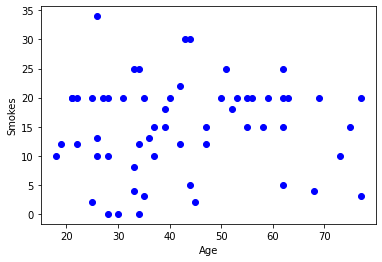

In [ ]:
X = input_data[["Age", "Smokes"]]
# Visualize data point
plt.scatter(X["Age"], X["Smokes"], c="blue")
plt.xlabel("Age")
plt.ylabel("Smokes")
plt.show()

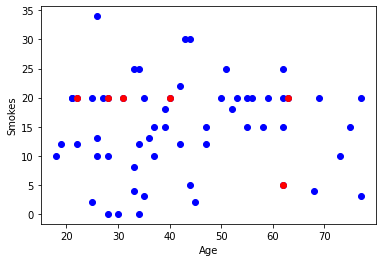

In [ ]:
K=6

# select random observation as a centriod 
Centroids = (X.sample(n=K))
plt.scatter(X["Age"], X["Smokes"], c="blue")
plt.scatter(Centroids["Age"], Centroids["Smokes"], c="red")
plt.xlabel("Age")
plt.ylabel("Smokes")
plt.show()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Centroids

,Age,Smokes
18,62,5
46,31,20
29,40,20
43,63,20
13,28,20
22,22,20


In [ ]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1, row_c in Centroids.iterrows():
        ED=[]
        for index2, row_d in XD.iterrows():
            d1 = (row_c["Age"]-row_d["Age"])**2
            d2 = (row_c["Smokes"]-row_d["Smokes"])**2
            d = sqrt(d1+d2)
            ED.append(d)
        X[i] = ED
        i = i+1
    C = []
    for index, row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos = i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Smokes", "Age"]]
    if j == 0:
        diff = 1
        j = j+1
    else:
        diff = (Centroids_new['Smokes'] - Centroids['Smokes']).sum() + (Centroids_new['Age'] - Centroids['Age']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Smokes","Age"]]
 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


7.109054834054833
2.988320013320017
1.6256410256410252
-1.1553113553113583
-1.258241758241752
-1.503080253080264
-0.22759740259740768
0.07142857142857295
-0.3670634920634921
0.009920634920632665
-0.3571428571428541
0.5207264957264983
1.120940170940166
0.0


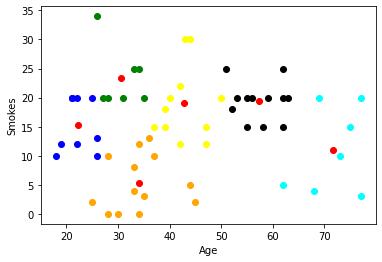

In [ ]:
color=['blue','green','cyan','orange','black','yellow']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Age"],data["Smokes"],c=color[k])
plt.scatter(Centroids["Age"],Centroids["Smokes"],c='red')
plt.xlabel('Age')
plt.ylabel('Smokes')
plt.show()

In [ ]:
X = np.array(list(zip("Age", "Smokes"))).reshape(len("Age"), 2)

In [ ]:
df2 = data[['Age' , 'Smokes' ]].copy()
x = df2.head(60)
x

,Age,Smokes
15,39,18
16,42,22
26,37,15
29,40,20
32,47,15
40,50,20
41,47,12
44,39,15
50,42,12
51,44,30


Text(0, 0.5, 'WCSS')

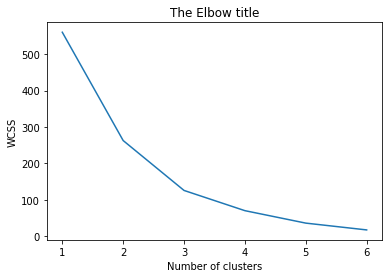

In [ ]:
wcss=[]
for i in range(1,7):
  kmeans = KMeans(i)
  kmeans.fit(x)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)


number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')